In [61]:
import numpy as np



def Func(x, y1):
    return x * np.exp(-x) - y1

def Proizv(x, y2):
    return (1-x)*np.exp(-x) - y2

def Tailor1(x, y1, y2, h):
    return y1 + h * (y2 + h / 2 * (Func(x, y1) + y2))


def Tailor2(x, y1, y2, h):
    return y2 + h * (Func(x, y1) + h / 2 * (Proizv(x, y2) - Func(x, y1)))

y1 = 1 
y2 = 0
y3 = 16
y1n = 0
y2n = 0
h = 1
eps = 0.01

delt_y = list()
delt_y1 = list()


x = 0
f = open('ans1.dat', 'w')
y3 = (1./2.) * np.exp(0) * (0 + (np.exp(0)*np.cos(0)) + 1)
s = str(str(x) + " " + str(y1) + " " + str(y2) + " " + str(y3) + '\n' )
f.write(s)


while (x >= 0 and x <= 2):
    y1n = Tailor1(x, y1, y2, h)
    y2n = Tailor2(x, y1, y2, h)
    x += h
    y1 = y1n
    y2 = y2n
    s = str(str(x) + " " + str(y1) + " " + str(y2) + '\n' )
        
    delt_y.append(y1)
    delt_y1.append(-1)
        
h = h / 2 
i = 1
delt = 100
while (delt > eps):
    x = 0
    y1 = 1 
    y2 = 0
    y3 = 16
    y1n = 0
    y2n = 0
    delt_y1 = delt_y
    delt_y = list()
    while (x >= 0 and x <= 2):
        y1n = Tailor1(x, y1, y2, h)
        y2n = Tailor2(x, y1, y2, h)
        x += h
        y1 = y1n
        y2 = y2n
        s = str(str(x) + " " + str(y1) + " " + str(y2) + '\n' )
        

        delt_y.append(y1)
    norm = list()
    for i in range(len(delt_y1)):
        norm.append(abs(delt_y1[i]) - delt_y[i*2])
    delt = abs((max(norm)))
    
    
    if(delt > eps):           
        h = h / (2 * i)
        i += 1
    
        
x = 0
y1 = 1 
y2 = 0
y3 = 16
y1n = 0
y2n = 0        
while (x >= 0 and x <= 2):
    y1n = Tailor1(x, y1, y2, h)
    y2n = Tailor2(x, y1, y2, h)
    x += h
    y1 = y1n
    y2 = y2n
    y3 = (1./2.) * np.exp(-x) * (x + (np.exp(x)*np.cos(x)) + 1)
    s = str(str(x) + " " + str(y1) + " " + str(y2) + " " + str(y3) + '\n' )
    f.write(s)
f.close()
print(h, '- шаг')


0.015625 - шаг


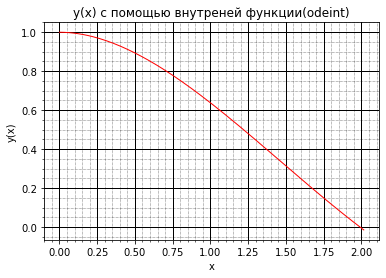

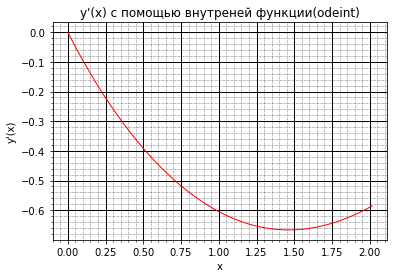

In [62]:
import numpy as np
from scipy. integrate import odeint
import matplotlib.pyplot as plt
import pylab


def F(y, x):
    dudx = y[1]
    dvdx = x * np.exp(-x) - y[0]
    return(dudx, dvdx)


x = np.arange( 0, 2+2*h, h) # vector of time
y0 = [1, 0] # start value
w = odeint(F, y0, x) # solve eq.
y1vnt = w[:,0]
y2vnt = w[:,1]

fig = plt.figure(facecolor='white')
plt.plot(x, y1vnt, 'r', linewidth=1)
plt.title("y(x) с помощью внутреней функции(odeint)")
plt.ylabel("y(x)")
plt.xlabel("x")
pylab.minorticks_on()
pylab.grid(color="black", which="major", linewidth=1)
pylab.grid(color="k", which="minor", linestyle=":", linewidth=0.5)
plt.show()

plt.plot(x, y2vnt, 'r', linewidth=1)
plt.title("y'(x) с помощью внутреней функции(odeint)")
plt.ylabel("y'(x)")
plt.xlabel("x")
pylab.minorticks_on()
pylab.grid(color="black", which="major", linewidth=1)
pylab.grid(color="k", which="minor", linestyle=":", linewidth=0.5)
plt.show() # display

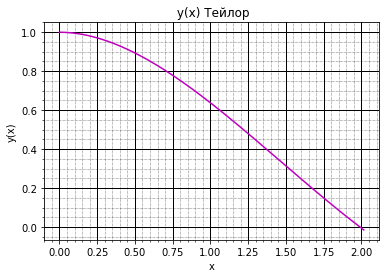

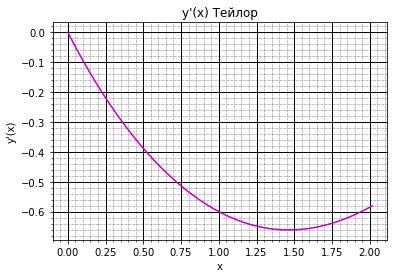

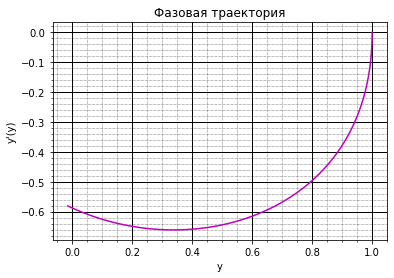

In [63]:
import pylab
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt ("ans1.dat")

pylab.minorticks_on()
pylab.grid(color="black", which="major", linewidth=1)
pylab.grid(color="k", which="minor", linestyle=":", linewidth=0.5)
plt.plot(data[:,0], data[:,1],color='m')
plt.title(" y(x) Тейлор")
plt.ylabel("y(x)")
plt.xlabel("x")

pylab.show()

pylab.minorticks_on()
pylab.grid(color="black", which="major", linewidth=1)
pylab.grid(color="k", which="minor", linestyle=":", linewidth=0.5)
plt.plot(data[:,0], data[:,2],color= 'm')
plt.title("y'(x) Тейлор")
plt.ylabel("y'(x)")
plt.xlabel("x")
pylab.show()

pylab.minorticks_on()
pylab.grid(color="black", which="major", linewidth=1)
pylab.grid(color="k", which="minor", linestyle=":", linewidth=0.5)
plt.plot(data[:,1], data[:,2],color= 'm')
plt.title(" Фазовая траектория ")
plt.ylabel("y'(y)")
plt.xlabel("y")
pylab.show()


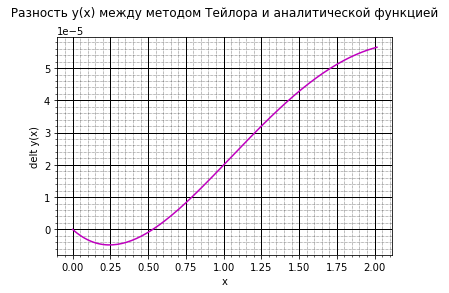

In [64]:
import pylab
import numpy as np
import matplotlib.pyplot as plt
pylab.minorticks_on()
pylab.grid(color="black", which="major", linewidth=1)
pylab.grid(color="k", which="minor", linestyle=":", linewidth=0.5)
data=np.loadtxt ("ans1.dat")
plt.plot(data[:,0], data[:,1] - data[:,3],color='m')
plt.title(" Разность y(x) между методом Тейлора и аналитической функцией \n")
plt.ylabel("delt y(x)")
plt.xlabel("x")

pylab.show()

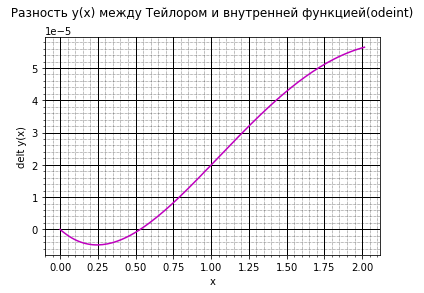

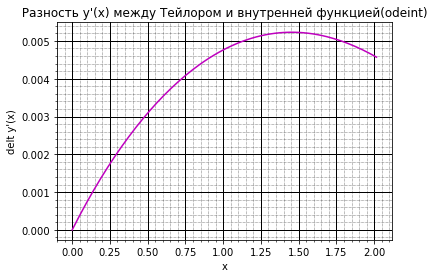

In [65]:
import pylab
import numpy as np
import matplotlib.pyplot as plt
pylab.minorticks_on()
pylab.grid(color="black", which="major", linewidth=1)
pylab.grid(color="k", which="minor", linestyle=":", linewidth=0.5)
data=np.loadtxt ("ans1.dat")
plt.plot(data[:,0], data[:,1] - w[:,0],color='m')
plt.title(" Разность y(x) между Тейлором и внутренней функцией(odeint) \n")
plt.ylabel("delt y(x)")
plt.xlabel("x")

pylab.show()

pylab.minorticks_on()
pylab.grid(color="black", which="major", linewidth=1)
pylab.grid(color="k", which="minor", linestyle=":", linewidth=0.5)
plt.plot(data[:,0], data[:,2] - y2vnt,color='m')
plt.title(" Разность y'(x) между Тейлором и внутренней функцией(odeint) ")
plt.ylabel("delt y'(x)")
plt.xlabel("x")

pylab.show()

# Задание № 8

Выполнили студенты группы 428:

Галкин Максим и Летавин Артём

## Вариант № 4
Задание билета: Решить методом Тейлора 2-го порядка задачу Коши

![1.jpg](Formuls/1.png)

с заданной относительной точностью 0,01.
Требуется построение графиков решения ![2.jpg](Formuls/2.jpg), а также фазовых траекторий.


## Теоретическая часть
**Метод разложения в ряд Тейлора**
Простейшим способом построения приближенного решения в точке ![3.jpg](Formuls/3.jpg) сетки ![4.jpg](Formuls/4.jpg) является способ, основанный на разложении решения в ряд Тейлора в предыдущей точке сетки ![5.jpg](Formuls/5.jpg) по степеням шага ***h***:

![6.jpg](Formuls/6.jpg)

Взяв вместо этого ряда конечный его отрезок

![7.jpg](Formuls/7.jpg)

и заменяя в нем производные ![13.jpg](Formuls/13.jpg) в силу дифференциального уравнения 

![8.jpg](Formuls/8.jpg)

![9.jpg](Formuls/9.jpg)

получаем последовательность приближений

![10.jpg](Formuls/10.jpg)

Отсюда, в частности, при ***p = 1*** получаем схему

![11.jpg](Formuls/11.jpg)

(метод Эйлера), а при ***p = 2*** - схему

![12.jpg](Formuls/12.jpg)

## Практическая часть
Программа содержит ряд ключевых *функций*:
* **Func** возвращает значение функции ***y"(x)*** в точке x.
* **Proizv** - производная функции ***y"(x)***.
* **Tailor1** - метод Тейлора 2-го порядка с заданной относительной точностью 0,01.
* **Tailor2** - метод Тейлора 2-го порядка с заданной относительной точностью 0,01.


### Результаты
В результате работы программы задача Коши  

![1.jpg](Formuls/1.png)

была решена методом Тейлора 2-го порядка с заданной относительной точностью 0,01. Ниже приведены графики решения ![2.jpg](Formuls/2.jpg), а также фазовые траектории.

![y(x).png](Formuls/y(x).png) ![y'(x).png](Formuls/y'(x).png) ![y'(y).png](Formuls/y'(y).png)

Также в коде программы выполнены дополнительные задания.